**Akshat Aggarwal**

**E22CSEU0020**

**Question:-1**

In [18]:
#Loading Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

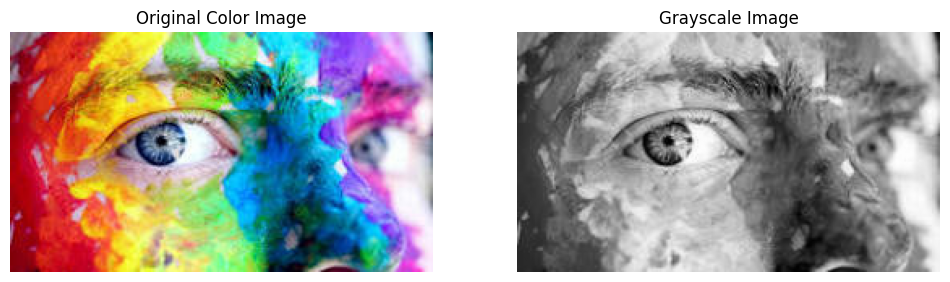

In [19]:
#Loading image
image = cv2.imread('/content/color.jpeg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Color Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.show()

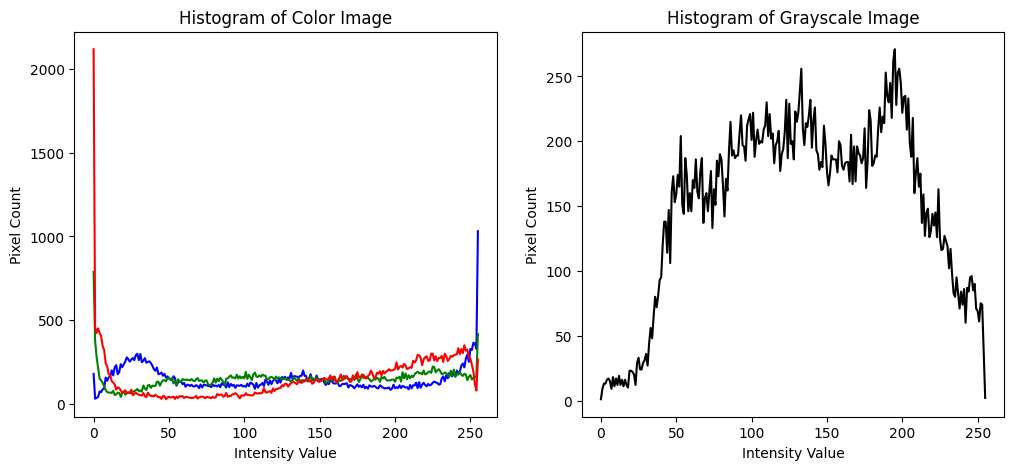

In [20]:
#Plotting Histogram for both images
plt.figure(figsize=(12, 5))

# Histogram for color image
plt.subplot(1, 2, 1)
colors = ("b", "g", "r")
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("Histogram of Color Image")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

# Histogram for grayscale image
plt.subplot(1, 2, 2)
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(hist_gray, color="black")
plt.title("Histogram of Grayscale Image")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

plt.show()

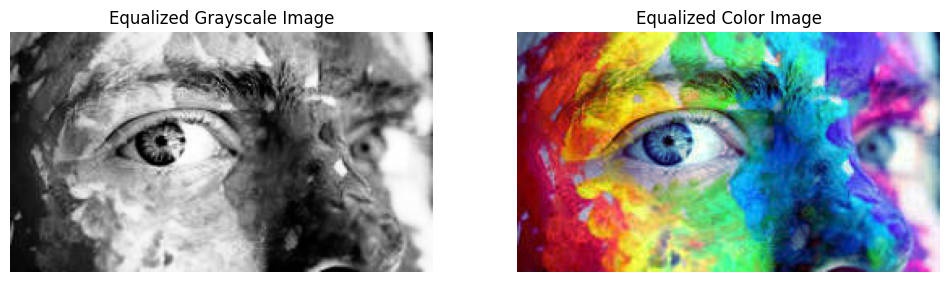

In [30]:
# Histogram Equalization
equalized_gray = cv2.equalizeHist(gray_image)
equalized_color = cv2.merge([
    cv2.equalizeHist(image[:, :, 0]),  # Blue Channel
    cv2.equalizeHist(image[:, :, 1]),  # Green Channel
    cv2.equalizeHist(image[:, :, 2])   # Red Channel
])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB))
plt.title("Equalized Color Image")
plt.axis("off")

plt.subplot(1, 2, 1)
plt.imshow(equalized_gray, cmap="gray")
plt.title("Equalized Grayscale Image")
plt.axis("off")

plt.show()

**Question:-2**

In [22]:
#Applying fft and Ifft to our images
dft_gray = np.fft.fft2(gray_image)
dft_gray_shift = np.fft.fftshift(dft_gray)
magnitude_spectrum_gray = 20 * np.log(np.abs(dft_gray_shift) + 1)

dft_color = [np.fft.fft2(image[:, :, i]) for i in range(3)]
dft_color_shift = [np.fft.fftshift(dft) for dft in dft_color]
magnitude_spectrum_color = [20 * np.log(np.abs(shift) + 1) for shift in dft_color_shift]

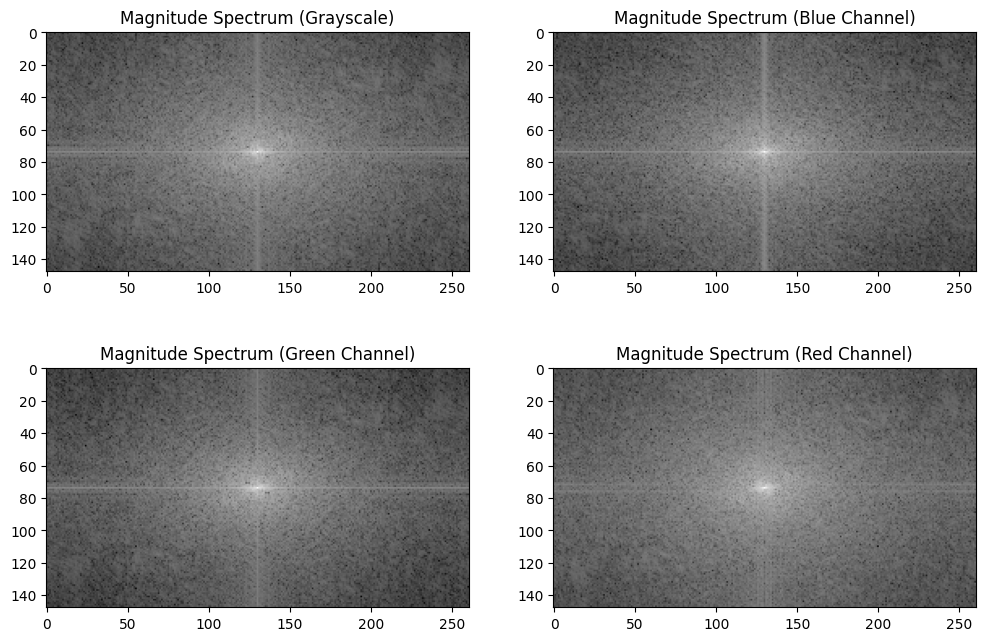

In [23]:
#Plotting figures
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(magnitude_spectrum_gray, cmap="gray")
plt.title("Magnitude Spectrum (Grayscale)")

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum_color[0], cmap="gray")
plt.title("Magnitude Spectrum (Blue Channel)")

plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum_color[1], cmap="gray")
plt.title("Magnitude Spectrum (Green Channel)")

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_color[2], cmap="gray")
plt.title("Magnitude Spectrum (Red Channel)")

plt.show()

In [24]:
# Reconstructing images
idft_gray_shift = np.fft.ifftshift(dft_gray_shift)
reconstructed_gray = np.fft.ifft2(idft_gray_shift)
reconstructed_gray = np.abs(reconstructed_gray)

idft_color_shift = [np.fft.ifftshift(shift) for shift in dft_color_shift]
reconstructed_color = [np.fft.ifft2(shift) for shift in idft_color_shift]
reconstructed_color = [np.abs(channel) for channel in reconstructed_color]

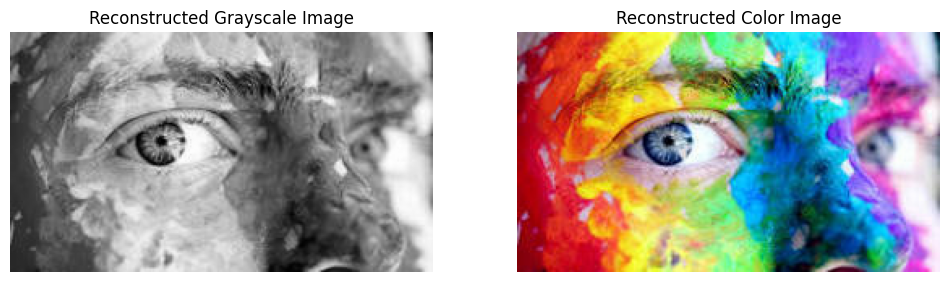

In [25]:
reconstructed_color_image = cv2.merge(reconstructed_color)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_gray, cmap="gray")
plt.title("Reconstructed Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_color_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Reconstructed Color Image")
plt.axis("off")

plt.show()

In [26]:
#Rotating and applying fft
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

rotated_gray = cv2.warpAffine(gray_image, rotation_matrix, (w, h))
rotated_color = cv2.warpAffine(image, rotation_matrix, (w, h))

In [27]:
dft_gray_rot = np.fft.fft2(rotated_gray)
dft_gray_rot_shift = np.fft.fftshift(dft_gray_rot)
magnitude_spectrum_gray_rot = 20 * np.log(np.abs(dft_gray_rot_shift) + 1)

dft_color_rot = [np.fft.fft2(rotated_color[:, :, i]) for i in range(3)]
dft_color_rot_shift = [np.fft.fftshift(dft) for dft in dft_color_rot]
magnitude_spectrum_color_rot = [20 * np.log(np.abs(shift) + 1) for shift in dft_color_rot_shift]

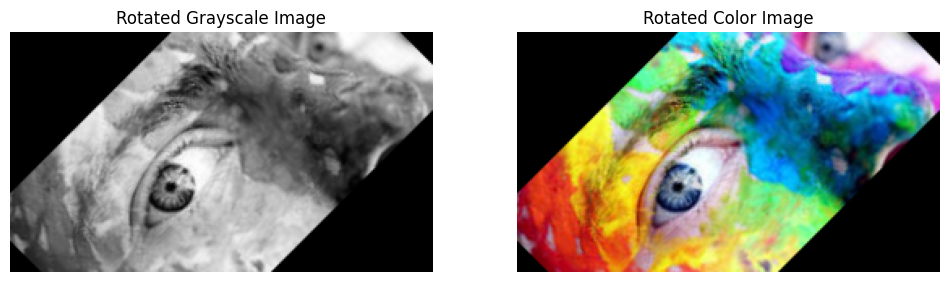

In [28]:
#Displaying images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_gray, cmap="gray")
plt.title("Rotated Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_color, cv2.COLOR_BGR2RGB))
plt.title("Rotated Color Image")
plt.axis("off")

plt.show()

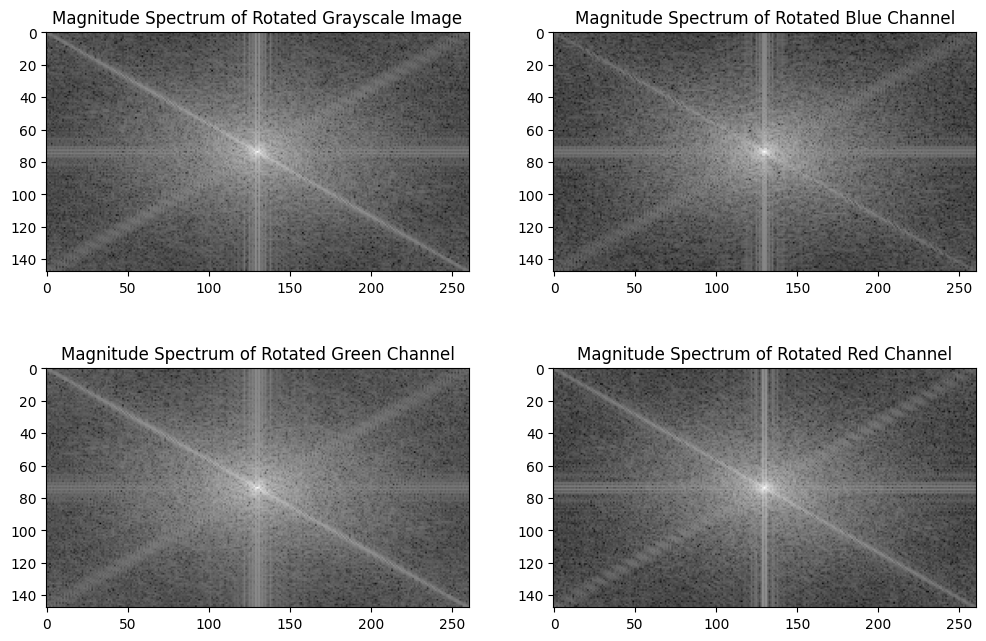

In [29]:
#Displaying magnitude images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(magnitude_spectrum_gray_rot, cmap="gray")
plt.title("Magnitude Spectrum of Rotated Grayscale Image")

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum_color_rot[0], cmap="gray")
plt.title("Magnitude Spectrum of Rotated Blue Channel")

plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum_color_rot[1], cmap="gray")
plt.title("Magnitude Spectrum of Rotated Green Channel")

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_color_rot[2], cmap="gray")
plt.title("Magnitude Spectrum of Rotated Red Channel")

plt.show()